In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure

In [3]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df


2020-06-23
2020-06-23 05:31:34.388841
date and time = 23-06-2020_05-31-34


In [4]:
os.getcwd()

'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code'

### loading files

In [5]:
#change load directory 
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\labels')

#unpickle lists
with open('P_t_labels.pkl','rb') as f:
    P_t_labels = pickle.load(f)
    
with open( 'splitDF_labels.pkl','rb') as f:
    splitDF_labels = pickle.load(f)


In [6]:
P_t_labels.sort()

newP_t_labels = []
for label in P_t_labels:
    newlabel = label[20:-4]
    #print(newlabel)
    newP_t_labels.append(newlabel)

P_t_labels = newP_t_labels

In [7]:
P_t_labels = P_t_labels[12:25]

In [8]:
#change load directory 
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')
folder = 'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'
date = '22-06-2020_21-30-03'
#check last files produced
filelist = [file for file in os.listdir(folder) if file.startswith(date)]
filelist

['22-06-2020_21-30-03_P_t_testdf_adult1_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult1_weekend.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult2_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult2_weekend.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult3_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult3_weekend.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult4_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_adult4_weekend.pkl',
 '22-06-2020_21-30-03_P_t_testdf_child_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_child_weekend.pkl',
 '22-06-2020_21-30-03_P_t_testdf_senior_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_testdf_senior_weekend.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult1_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult1_weekend.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult2_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult2_weekend.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult3_weekdays.pkl',
 '22-06-2020_21-30-03_P_t_traindf_adult3_weekend.pkl',
 '22-06-2020_21

In [9]:
#and unpickle them!
#while assigning them to variables from list
#manually cause i am dumb


#i dont really need to create or load the P_t test..anyhow

with open( '22-06-2020_21-30-03_P_t_testdf_adult1_weekdays.pkl','rb') as f:
    P_t_testdf_adult1_weekdays = pickle.load(f)    
with open( '22-06-2020_21-30-03_P_t_testdf_adult1_weekend.pkl','rb') as f:   
    P_t_testdf_adult1_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_testdf_adult2_weekdays.pkl','rb') as f:
    P_t_testdf_adult2_weekdays = pickle.load(f)  
with open( '22-06-2020_21-30-03_P_t_testdf_adult2_weekend.pkl','rb') as f:   
    P_t_testdf_adult2_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_testdf_adult3_weekdays.pkl','rb') as f:
    P_t_testdf_adult3_weekdays = pickle.load(f)   
with open( '22-06-2020_21-30-03_P_t_testdf_adult3_weekend.pkl','rb') as f:   
    P_t_testdf_adult3_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_testdf_adult4_weekdays.pkl','rb') as f:
    P_t_testdf_adult4_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_testdf_adult4_weekend.pkl','rb') as f:   
    P_t_testdf_adult4_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_testdf_child_weekdays.pkl','rb') as f:
    P_t_testdf_child_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_testdf_child_weekend.pkl','rb') as f:   
    P_t_testdf_child_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_testdf_senior_weekdays.pkl','rb') as f:
    P_t_testdf_senior_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_testdf_senior_weekend.pkl','rb') as f:   
    P_t_testdf_senior_weekend= pickle.load(f)
    

    

    
with open( '22-06-2020_21-30-03_P_t_traindf_adult1_weekdays.pkl','rb') as f:
    P_t_traindf_adult1_weekdays = pickle.load(f)    
with open( '22-06-2020_21-30-03_P_t_traindf_adult1_weekend.pkl','rb') as f:   
    P_t_traindf_adult1_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult2_weekdays.pkl','rb') as f:
    P_t_traindf_adult2_weekdays = pickle.load(f)  
with open( '22-06-2020_21-30-03_P_t_traindf_adult2_weekend.pkl','rb') as f:   
    P_t_traindf_adult2_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult3_weekdays.pkl','rb') as f:
    P_t_traindf_adult3_weekdays = pickle.load(f)   
with open( '22-06-2020_21-30-03_P_t_traindf_adult3_weekend.pkl','rb') as f:   
    P_t_traindf_adult3_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult4_weekdays.pkl','rb') as f:
    P_t_traindf_adult4_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_adult4_weekend.pkl','rb') as f:   
    P_t_traindf_adult4_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_traindf_child_weekdays.pkl','rb') as f:
    P_t_traindf_child_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_child_weekend.pkl','rb') as f:   
    P_t_traindf_child_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_traindf_senior_weekdays.pkl','rb') as f:
    P_t_traindf_senior_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_senior_weekend.pkl','rb') as f:   
    P_t_traindf_senior_weekend= pickle.load(f)
    

In [10]:
# we will use only the transition matrices of the training set

all_week_P_t = [P_t_traindf_adult1_weekdays,
 P_t_traindf_adult1_weekend,
 P_t_traindf_adult2_weekdays,
 P_t_traindf_adult2_weekend,
 P_t_traindf_adult3_weekdays,
 P_t_traindf_adult3_weekend,
 P_t_traindf_adult4_weekdays,
 P_t_traindf_adult4_weekend,
 P_t_traindf_child_weekdays,
 P_t_traindf_child_weekend,
 P_t_traindf_senior_weekdays,
 P_t_traindf_senior_weekend]

In [11]:
#loading new test sets for validation
test_df_child_weekdays = loadCSV('22-06-2020_21-30-03_testdf_child_weekdays.csv')
test_df_child_weekend = loadCSV('22-06-2020_21-30-03_testdf_child_weekend.csv')

test_df_adult1_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult1_weekdays.csv')
test_df_adult1_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult1_weekend.csv')

test_df_adult2_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult2_weekdays.csv')
test_df_adult2_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult2_weekend.csv')

test_df_adult3_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult3_weekdays.csv')
test_df_adult3_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult3_weekend.csv')

test_df_adult4_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult4_weekdays.csv')
test_df_adult4_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult4_weekend.csv')

test_df_senior_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_senior_weekdays.csv')
test_df_senior_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_senior_weekend.csv')

loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_child_weekdays.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_child_weekend.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_adult1_weekdays.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_adult1_weekend.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_adult2_weekdays.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/22-06-2020_21-30-03_testdf_adult2_weekend.csv
loading:  C:/Users/arita/Documents/private/Data Engineeri

In [41]:
#collect them and their labels
all_week_test_df = [test_df_adult1_weekdays,
test_df_adult1_weekend,
test_df_adult2_weekdays,
test_df_adult2_weekend,
test_df_adult3_weekdays,
test_df_adult3_weekend,
test_df_adult4_weekdays,
test_df_adult4_weekend,
test_df_child_weekdays,
test_df_child_weekend,                   
test_df_senior_weekdays,
test_df_senior_weekdays]

all_week_test_df_labels = ['test_df_adult1_weekdays',
'test_df_adult1_weekend',
'test_df_adult2_weekdays',
'test_df_adult2_weekend',
'test_df_adult3_weekdays',
'test_df_adult3_weekend',
'test_df_adult4_weekdays',
'test_df_adult4_weekend',
'test_df_senior_weekdays',
'test_df_senior_weekdays']

In [13]:
time_converter_df = loadCSV('21-06-2020_11-20-39_time_converter_df.csv')

loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_time_converter_df.csv


### Old loading 

In [52]:
os.getcwd()

'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'

In [48]:
os.getcwd()
folder = 'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')
os.chdir(folder)

In [49]:
#loading test sets for validation
test_df_child = loadCSV('21-06-2020_11-20-39_test_df_child.csv')
test_df_adult1 = loadCSV('21-06-2020_11-20-39_test_df_adult1.csv')
test_df_adult2 = loadCSV('21-06-2020_11-20-39_test_df_adult2.csv')
test_df_adult3 = loadCSV('21-06-2020_11-20-39_test_df_adult3.csv')
test_df_adult4 = loadCSV('21-06-2020_11-20-39_test_df_adult4.csv')
test_df_senior = loadCSV('21-06-2020_11-20-39_test_df_senior.csv')


loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_child.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult1.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult2.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult3.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult4.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_senior.csv


In [50]:
#collect them and their labels
all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [53]:
#unpickle 3D matrix P_t previously saved
#with open('20-06-2020_14-19-49_P_t_senior.pkl','rb') as f:
    #P_t_senior = pickle.load(f)
    #print(P_t_senior.shape)
    
with open('21-06-2020_11-20-39_P_t_child.pkl','rb') as f:
    P_t_child = pickle.load(f)
    
with open( '21-06-2020_11-20-39_P_t_adult1.pkl','rb') as f:
    P_t_adult1 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult2.pkl','rb') as f:
    P_t_adult2 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult3.pkl','rb') as f:
    P_t_adult3 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult4.pkl','rb') as f:
    P_t_adult4 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_senior.pkl','rb') as f:
    P_t_senior = pickle.load(f)
    

In [54]:
#append all P_t in one vector
all_P_t = []
all_P_t.append(P_t_child)
all_P_t.append(P_t_adult1)
all_P_t.append(P_t_adult2)
all_P_t.append(P_t_adult3)
all_P_t.append(P_t_adult4)
all_P_t.append(P_t_senior)

In [55]:
#append all dataframes_labels in one vector

all_P_t_labels = []
all_P_t_labels.append('P_t_child')
all_P_t_labels.append('P_t_adult1')
all_P_t_labels.append('P_t_adult2')
all_P_t_labels.append('P_t_adult3')
all_P_t_labels.append('P_t_adult4')
all_P_t_labels.append('P_t_senior')

In [56]:
# lets look into them 
counter = 0
for P_t_i in all_P_t:
    t = random.randint(0,144)
    print ("%s at time %s" %(all_P_t_labels[counter],t))
    print (P_t_i[0])
    counter +=1


P_t_child at time 22
[[9.98841251e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.79374276e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.79374276e-04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000

### support functions

In [57]:
# support functions

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def printlist(list):
    c = 0
    for element in list:
        c +=1
        print (c,element)
        
def cartesian_product(arr1, arr2): 
    return list(product(arr1, arr2))

def splitstring(word): 
    return [char for char in word]

def keep1(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(str(num)[:1]) 
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(str(arrayorint)[:1]) 
    return new

def takeFirstNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[0]
    return x

def takeSecNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[1]
    return x

# to simplify the activity lists
def keepOne(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(np.floor(num / 1000))
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(np.floor(arrayorint / 1000))
    return new

In [58]:
keepOne([ 110,  111, 3110, 5120,  210,  300, 3710, 9890, 3440, 8210, 8110,
       7241, 3430,  310, 8120,  390, 9310, 9510, 3000, 1000, 3130, 8212,
       8219, 9960, 5140, 3210, 3620, 5190, 9000, 5310, 4320, 9940, 4300,
       7170, 6110, 3611, 9360, 9370, 3630, 7310, 3310, 3240, 3540, 3410,
       9120, 1110, 1390, 9950, 3520, 3610, 9500, 3539, 5240, 7330, 8000,
       8100, 7250, 9970, 9430, 3290, 3320, 4210, 3929, 4220, 8310, 3230,
       4281, 4200, 7121, 5110, 4250, 6131, 6120, 8320, 3250, 9990, 3613,
       3420, 8229, 9520, 5294, 4230, 4279, 9820, 9420, 9610, 6190, 3721,
       8190, 4110, 8220, 9410, 7251, 3921, 3911, 9390, 3722, 9980, 6111,
       7259, 3220, 5290, 7231,    0, 7329, 8300, 8211, 3830, 5299, 6149,
       6150, 6144, 5250, 3619, 9800, 4273, 3920, 8319, 3727, 7239, 6160,
       3600, 3530, 3910, 1120, 3190, 9999, 3330, 9230, 4271, 7321, 1310,
       5210, 5223, 6143, 4120, 3819, 9720, 7190, 3725, 9380, 4274, 4310,
       9810, 7100, 7112, 6119, 3720, 9600, 3615, 4240, 3140, 9010, 2210,
       7130, 7111, 9440, 3200, 7322, 6100, 3919, 5230, 5291, 6140, 4270,
        120, 5241, 5249, 3729, 7220, 5295, 7340, 3820, 9210, 4283, 9710,
       7240, 3690, 6171, 9110, 5130, 6000, 4000, 3100, 6141, 3500, 3390,
       8221, 3614, 3810, 3811, 1210, 3612, 7300, 3914, 2110, 8312, 3490,
       8311, 4289, 7230, 6130, 3531, 5221, 6311, 5100, 9400, 4190, 6210,
       7390, 1100, 3724, 5000, 2100, 1399, 4260, 1300, 5229, 9100, 9130,
       3590, 5220, 6312, 3924, 3300, 4272, 7249])

array([0, 0, 3, 5, 0, 0, 3, 9, 3, 8, 8, 7, 3, 0, 8, 0, 9, 9, 3, 1, 3, 8,
       8, 9, 5, 3, 3, 5, 9, 5, 4, 9, 4, 7, 6, 3, 9, 9, 3, 7, 3, 3, 3, 3,
       9, 1, 1, 9, 3, 3, 9, 3, 5, 7, 8, 8, 7, 9, 9, 3, 3, 4, 3, 4, 8, 3,
       4, 4, 7, 5, 4, 6, 6, 8, 3, 9, 3, 3, 8, 9, 5, 4, 4, 9, 9, 9, 6, 3,
       8, 4, 8, 9, 7, 3, 3, 9, 3, 9, 6, 7, 3, 5, 7, 0, 7, 8, 8, 3, 5, 6,
       6, 6, 5, 3, 9, 4, 3, 8, 3, 7, 6, 3, 3, 3, 1, 3, 9, 3, 9, 4, 7, 1,
       5, 5, 6, 4, 3, 9, 7, 3, 9, 4, 4, 9, 7, 7, 6, 3, 9, 3, 4, 3, 9, 2,
       7, 7, 9, 3, 7, 6, 3, 5, 5, 6, 4, 0, 5, 5, 3, 7, 5, 7, 3, 9, 4, 9,
       7, 3, 6, 9, 5, 6, 4, 3, 6, 3, 3, 8, 3, 3, 3, 1, 3, 7, 3, 2, 8, 3,
       8, 4, 7, 6, 3, 5, 6, 5, 9, 4, 6, 7, 1, 3, 5, 2, 1, 4, 1, 5, 9, 9,
       3, 5, 6, 3, 3, 4, 7])

### main simulation

In [75]:
def SimulateActivitiesForThisListoFPeople(list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
                    this is eg to rapresent an household of two kids, two adults 30-45 and one adult >75
    numdays: how many days we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    
    for i in range(familysize):
        transitionMatrix = list_of_P_t[i]
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = ForecastAcitivtiesforNdays(transitionMatrix,i,activityToday, numdays)
        
        #add them to the container
        container_activityLists[i]= (activityList)
    
    return container_activityLists
    
def ForecastAcitivtiesforNdays(transitionMatrix,i = 0, activityToday = 0, days =1):
    #get the sim activity list
    #this list is 144*numdays
    activityList = activity_forecast(transitionMatrix,activityToday,days)
    #print (type(activityList))
    
    #save it proper 
    #in reality i am already saving out of here so...
    #savelabel ='SimActivities_'+all_P_t_labels[i]+'_NumOfDays_'+str(days)+".csv"
    
    #plot it
    plot_lenght = days*15
    plot_height = 4
    if plot_lenght>200:
        plot_lenght= 200
        plot_height = 8
    figure(figsize=(plot_lenght,plot_height))
    T = np.arange(len(activityList))
    
    plt.plot(T, activityList)
    plt.title('%s'%(all_P_t_labels[i]))
    plt.xlabel('time')
    plt.ylabel('activities')

    plt.xticks(np.arange(min(T), max(T)+1, 143))
    plt.yticks(np.arange(0, 9, 1))
    plt.grid(axis='activityList', linestyle='-')
    return activityList

#main
def activity_forecast(transitionMatrix,activityToday = 0, days =1,time_steps = 144):
    
    # Choose the starting state
    # shall this be random? 
    #activityToday = random.choice(states_id1)
    
    # Or we choose the starting state as sleep? 
    #activityToday = 0 #num int
    
    #anyhow append in the activity list
    activityList = [activityToday]
    prob = 1
    period = days*144
    for day in range(days):
        for t in range(1,time_steps):#zero is already appended!
            for current_state in states_id1: # we look for the activiy code in the array of possible states
                if activityToday != current_state:
                    continue
                else: # as soon as we 
                    #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                    #print (sum(transitionMatrix[t][current_state]))
                    #T = t
                    #t_counter = 1
                    if (sum(transitionMatrix[t][current_state]) == 0):
                        activityToday = current_state
                        activityList.append(current_state)    
                        
                        
                    #while (sum(transitionMatrix[T][current_state]) == 0):
                        #print ("this P_t row is empty: [%s] [%s]"% (T,current_state))
                        #T = t +t_counter
                        #t_counter += 1
                        
                        
                    else:
                        change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix[t][current_state])
                        for transition in transitionName[current_state]:
                            if change != transition: #type string 
                                continue
                            else:
                                next_state = takeSecNum(change)
                                prob = prob * transitionMatrix[t][current_state][next_state]
                                activityToday = next_state
                                activityList.append(next_state)
                                break
                        break
    return activityList

In [60]:
# the statespace
states_id1 = [0,1,2,3,4,5,6,7,8,9]
states_id2 = [0,1,2,3,4,5,6,7,8,9] #10 possible unique activties 
states = ["PERSONAL CARE","EMPLOYMENT","STUDY","HOUSEHOLD AND FAMILY CARE","VOLUNTEER WORK AND MEETING","SOCIAL LIFE AND ENTERTAINMENT","SPORTS AND OUTDOOR ACTIVITIES","HOBBIES, GAMES, AND COMPUTING","MASS MEDIA","TRAVEL AND UNSPECIFIED TIME USE"]

# all possibile sequences of couples of activities
# the activity can be the same before and after so (0,0) (1,1) are acceptable combinations
transitionCodes =cartesian_product(states_id1,states_id2)
transitionCoordinates = []
transitionName = [[],[],[],[],[],[],[],[],[],[]] #ten subarrays
#there is a better way to do this:
#transitionName = [[] for i in range(num_of_subarrays)]

allchunks = chunks(transitionCodes, len(states))

counter= 0
for item in allchunks:
    #print("transitionCoordinates[%i]: %s"%(counter,item))
    transitionCoordinates.append(item)
    counter += 1
    
counter= 0
for j in range(10):
    for k in range(10):
        d = transitionCoordinates[j][k][0] # decine, left element (d,)
        u = transitionCoordinates[j][k][1] # units, right element ,u)
        tot = ('%i%i'%(d,u))
        #print (counter,tot)
        transitionName[counter].append(tot)
    counter += 1
print ((transitionName[0]))
transition_array = np.array(transitionName)


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [69]:
T = time_converter_df['New_Time'].tolist()
len(T*2)
#min(T)
#max(T)

288

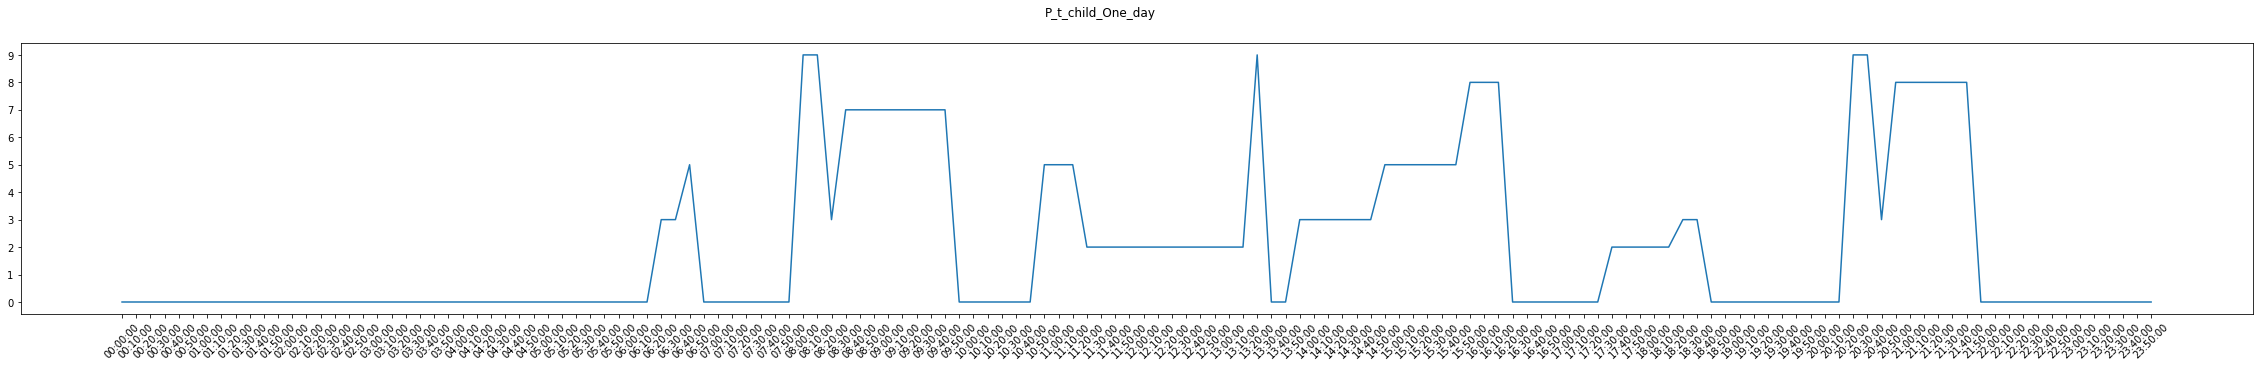

In [70]:
# SIMULATE ONE DAY
# note: at time it returns error because the sum of the row of P_t[t given] [j initial state] is not 1. 
# this shouldnt be possible. there must always be one state to move to (at least the same state!)
# how to catch why some lines at t = 0 are all zeros? 
transitionMatrix = all_P_t[0]
title = all_P_t_labels[0]+'_One_day'
activityList = activity_forecast(transitionMatrix,0)
fig = plt.figure(figsize=(40, 5))
fig.suptitle(title)
#T = np.arange(144)
plt.plot(T, activityList)
plt.xticks(rotation=45)
#plt.xticks(np.arange(min(T), max(T), 6))
#ax.set_xticks(ax.get_xticks()[::6])
plt.yticks(np.arange(0, 10, 1))
plt.grid(axis='activityList', linestyle='-')

#now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title
plt.savefig(savelabel+'.png')

https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1
This is a known numpy bug.


In [457]:
#transitionMatrix[86][4] 

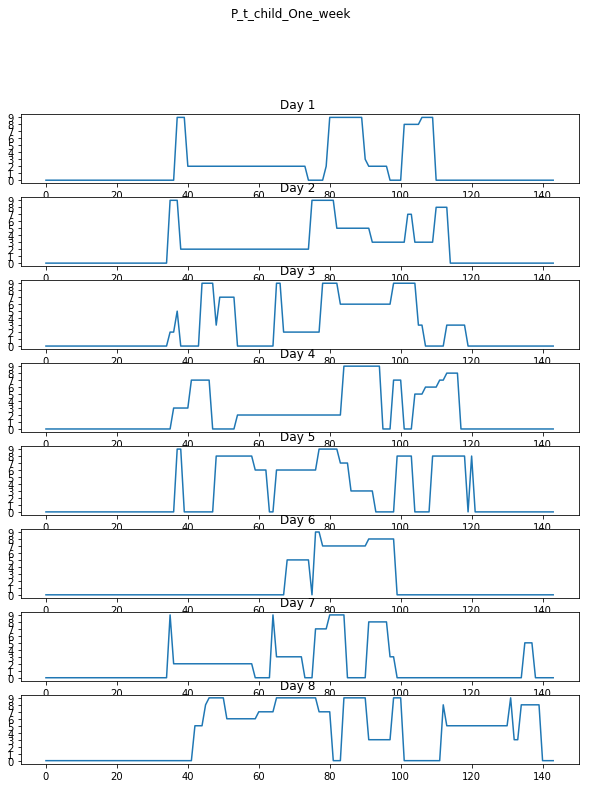

In [72]:
#SIMULATE MANY DAYS, in column
# To save every activityList
list_activity = []
count = 0

# lets simulate may days
for iterations in range(0,8):
        list_activity.append(activity_forecast(transitionMatrix,0))

fig = plt.figure(figsize=(10, 15))
title = all_P_t_labels[0]+'_One_week'
fig.suptitle(title )

counter = 1
for activityList in list_activity: 
    ax =  fig.add_subplot(10,1,counter)
    ax.set_title('Day %i '%counter)
    T = np.arange(144)
    plt.plot(T, activityList)
    plt.yticks(np.arange(0,10, 1))
    plt.grid(axis='activityList', linestyle='-')
    counter +=1
    
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title
plt.savefig(savelabel+'.png')

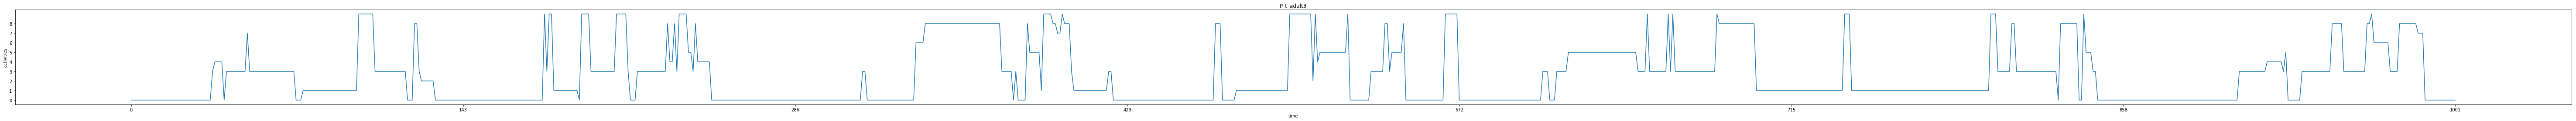

In [76]:
#SIMULATE MANY DAYS, in one time line
i = 3
numdays = 7
transitionMatrix = all_P_t[i]
title = all_P_t_labels[i]+'NumOfDays_'+str(numdays)
activityList = ForecastAcitivtiesforNdays(transitionMatrix,i,0,numdays)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savefig = dt_string+title
plt.savefig(savefig+'.png')

savelabel ='SimActivities_'+savefig+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(activityList, f)

In [348]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\activityLists')

lets simulate a family of 5, for 7 days


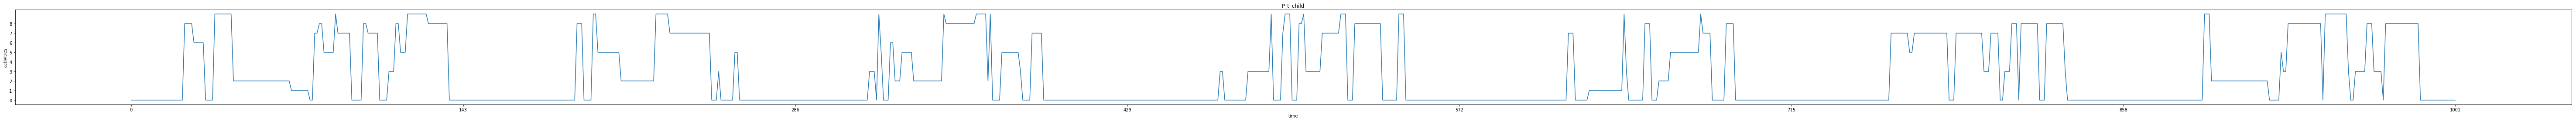

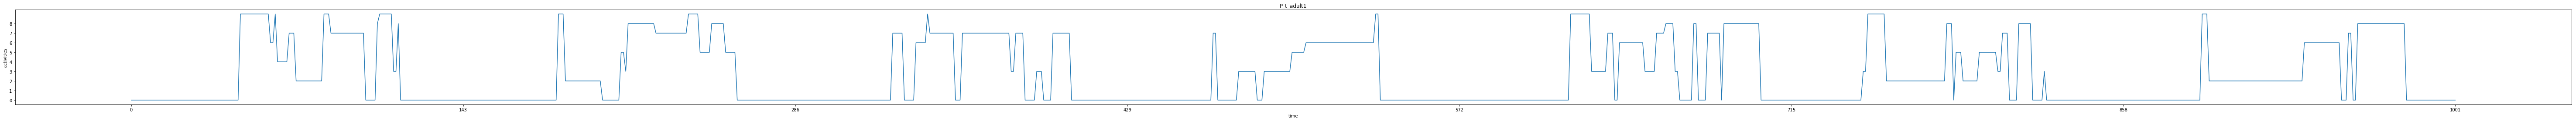

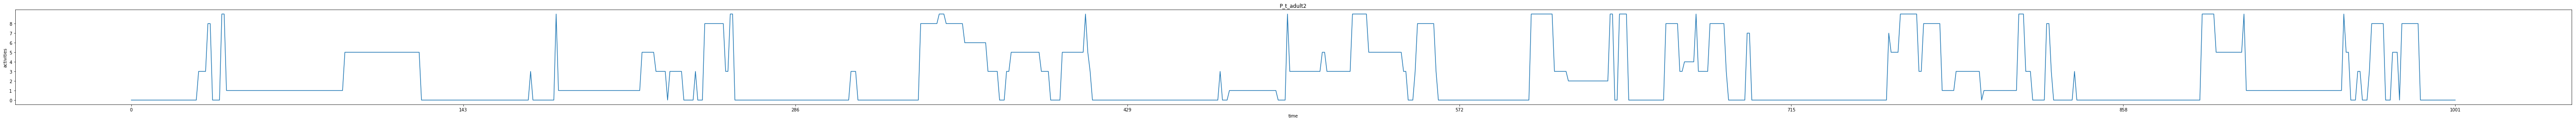

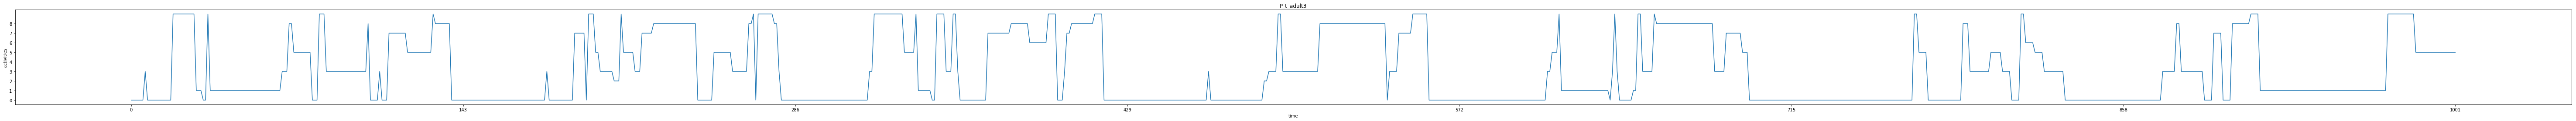

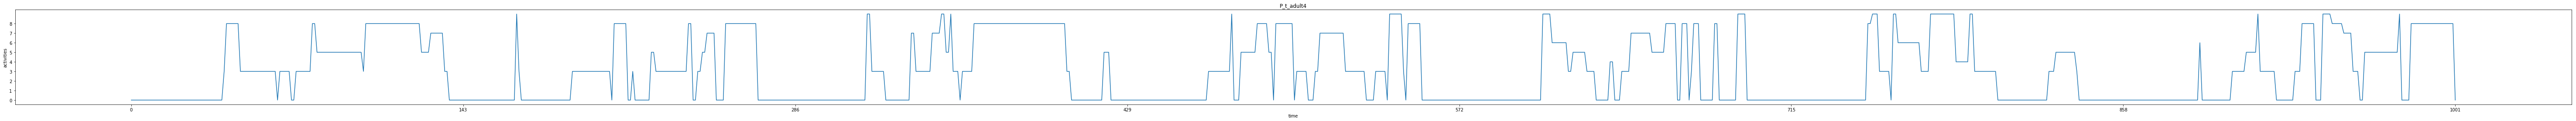

In [77]:
#SIMULATE A FAMILY OF PEOPLE FOR N DAYS 
list_of_people = []
list_of_people.append(P_t_child)
list_of_people.append(P_t_child)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_senior)

days = 7

container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

lets simulate a family of 2, for 365 days


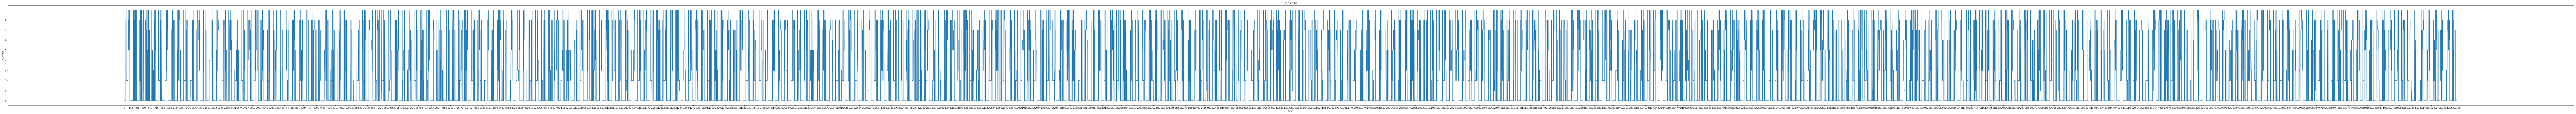

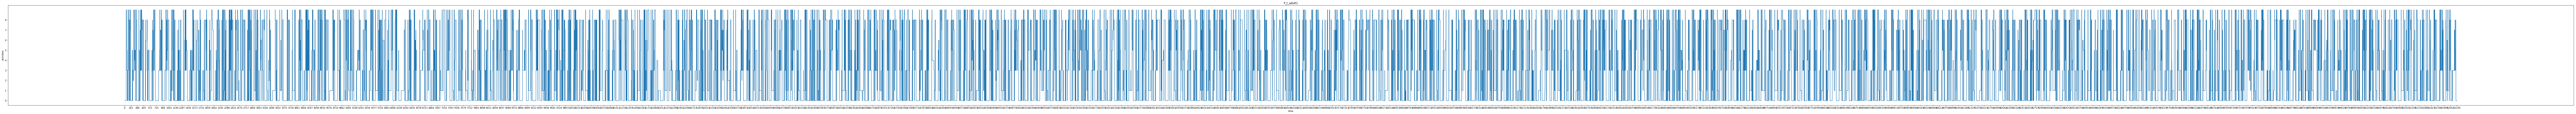

In [78]:
#SIMULATE TWO PERSONS FOR 365 DAYS 
list_of_people = []
#list_of_people.append(P_t_child)
list_of_people.append(P_t_child)
list_of_people.append(P_t_adult3)
#list_of_people.append(P_t_adult1)
#list_of_people.append(P_t_senior)

days = 365

container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

## Use weekly forecast

In [18]:
#even num --> weekdays
#uneven num --> weekend
i = 3
#print(P_t_labels[i])
#print(all_week_P_t[i])
#print("")
#print(all_week_test_df_labels[0])
#print(all_week_test_df[0])
P_t_labels}

['P_t_traindf_adult1_weekdays',
 'P_t_traindf_adult1_weekend',
 'P_t_traindf_adult2_weekdays',
 'P_t_traindf_adult2_weekend',
 'P_t_traindf_adult3_weekdays',
 'P_t_traindf_adult3_weekend',
 'P_t_traindf_adult4_weekdays',
 'P_t_traindf_adult4_weekend',
 'P_t_traindf_child_weekdays',
 'P_t_traindf_child_weekend',
 'P_t_traindf_senior_weekdays',
 'P_t_traindf_senior_weekend']

In [32]:
def Simulate_forNweeks_ForListoFPeople(numWeeks,list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
    each P_t per person weekdays has to be followed by respective weekend, eg:
    
                'P_t_traindf_adult1_weekdays',
                'P_t_traindf_adult1_weekend',
    numweeks: how many weeks we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    i = 0
    while i <= (len(familysize)-1):
        transitionMatrix = list_of_P_t[i]
        ransitionMatrix_weekdays,transitionMatrix_weekenddays = list_of_P_t[i],list_of_P_t[i+1]
        
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = Forecast_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday, weekdays =5,weekenddays = 2)
        
        #add them to the container
        container_activityLists[i]= (activityList)
        i +=2
    
    return container_activityLists
    
def Forecast_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0, weekdays =5,weekenddays = 2):
    #get the sim activity list
    #this list is 144*numdays
    activityList = []
    for w in range((numWeeks)):
        newactivityList = weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday, weekdays,weekenddays)
    
        #plot it # the rientrance is the difference btw one plot per week or one huge big plot
        #plot_lenght = numWeeks*15
        #plot_height = 4
        #if plot_lenght>200:
            #plot_lenght= 200
            #plot_height = 8
            
        #figure(figsize=(plot_lenght,plot_height))
        
        #title = P_t_labels[i]
        #title =title[:-9]
        #titlelabel = title+'_'+str(numWeeks)+'_week'
        #fig.suptitle(titlelabel)
        
        #T = np.arange(len(newactivityList))

        #plt.plot(T, newactivityList)
        #plt.title(titlelabel)
        #plt.xlabel('time')
        #plt.ylabel('activities')

        #plt.xticks(np.arange(min(T), max(T)+1, 143))
        #ax.axes.xaxis.set_visible(False)
        #ax.set_xticks(ax.get_xticks()[::6])
        #plt.yticks(np.arange(0, 10, 1))
        #plt.grid(axis='activityList', linestyle='-')
        
        activityList = activityList+newactivityList
    
    #plot it # the rientrance is the difference btw one plot per week or one huge big plot
    plot_lenght = numWeeks*15
    plot_height = 4
    if plot_lenght>200:
        plot_lenght= 200
        plot_height = 8

    figure(figsize=(plot_lenght,plot_height))

    title = P_t_labels[i]
    title =title[:-9]
    titlelabel = title+'_'+str(numWeeks)+'_week'
    #fig.suptitle(titlelabel)

    T = np.arange(len(activityList))

    plt.plot(T, activityList)
    plt.title(titlelabel)
    plt.xlabel('time')
    plt.ylabel('activities')

    #plt.xticks(np.arange(min(T), max(T)+1, 143))
    #ax.axes.xaxis.set_visible(False)
    #ax.set_xticks(ax.get_xticks()[::6])
    plt.yticks(np.arange(0, 10, 1))
    plt.grid(axis='activityList', linestyle='-')
    
    return activityList

#main
def weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0, weekdays =1,weekenddays = 1,time_steps = 144):
    
    # Choose the starting state
    # shall this be random? 
    #activityToday = random.choice(states_id1)
    
    # Or we choose the starting state as sleep? 
    #activityToday = 0 #num int
    
    #anyhow append in the activity list
    activityList = [activityToday]
    prob = 1
    
    #SIM WEEK-DAY(S)
    for day in range(weekdays):
        for t in range(1,time_steps):#zero is already appended!
            for current_state in states_id1: # we look for the activiy code in the array of possible states
                if activityToday != current_state:
                    continue
                else: # as soon as we 
                    #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                    #print (sum(transitionMatrix[t][current_state]))
                    #T = t
                    #t_counter = 1
                    if (sum(transitionMatrix_weekdays[t][current_state]) == 0):
                        activityToday = current_state
                        activityList.append(current_state)    
                        
                        
                    #while (sum(transitionMatrix[T][current_state]) == 0):
                        #print ("this P_t row is empty: [%s] [%s]"% (T,current_state))
                        #T = t +t_counter
                        #t_counter += 1
                        
                        
                    else:
                        change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix_weekdays[t][current_state])
                        for transition in transitionName[current_state]:
                            if change != transition: #type string 
                                continue
                            else:
                                next_state = takeSecNum(change)
                                prob = prob * transitionMatrix_weekdays[t][current_state][next_state]
                                activityToday = next_state
                                activityList.append(next_state)
                                break
                        break
                        
    activityToday = 0
    activityList.append(activityToday)                  
    #SIM WEEKEND-DAY(S)                    
    for day in range(weekenddays):
        for t in range(1,time_steps):#zero is already appended!
            for current_state in states_id1: # we look for the activiy code in the array of possible states
                if activityToday != current_state:
                    continue
                else: # as soon as we 
                    #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                    #print (sum(transitionMatrix[t][current_state]))
                    #T = t
                    #t_counter = 1
                    if (sum(transitionMatrix_weekenddays[t][current_state]) == 0):
                        activityToday = current_state
                        activityList.append(current_state)    
                        
                        
                    #while (sum(transitionMatrix[T][current_state]) == 0):
                        #print ("this P_t row is empty: [%s] [%s]"% (T,current_state))
                        #T = t +t_counter
                        #t_counter += 1
                        
                        
                    else:
                        change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix_weekenddays[t][current_state])
                        for transition in transitionName[current_state]:
                            if change != transition: #type string 
                                continue
                            else:
                                next_state = takeSecNum(change)
                                prob = prob * transitionMatrix_weekenddays[t][current_state][next_state]
                                activityToday = next_state
                                activityList.append(next_state)
                                break
                        break
    
    
    return activityList

0'P_t_traindf_adult1_weekdays',
1'P_t_traindf_adult1_weekend',
2'P_t_traindf_adult2_weekdays',
3'P_t_traindf_adult2_weekend',
4'P_t_traindf_adult3_weekdays',
5'P_t_traindf_adult3_weekend',
6'P_t_traindf_adult4_weekdays',
7'P_t_traindf_adult4_weekend',
8 'P_t_traindf_child_weekdays',
9 'P_t_traindf_child_weekend',
10 'P_t_traindf_senior_weekdays',
11 'P_t_traindf_senior_weekend']

In [20]:
T = time_converter_df['New_Time'].tolist()
len(T*2)
#min(T)
#max(T)

288

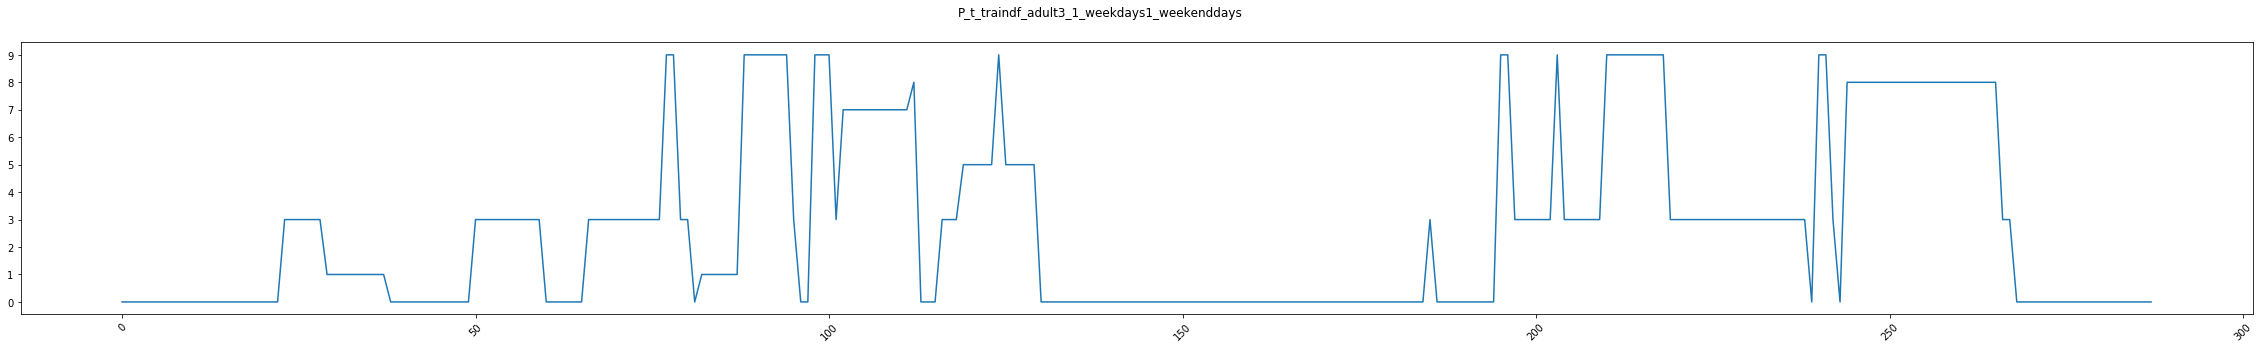

In [26]:
#sim one weekday and one weekend day for person
i = 4
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

weekdays =1
weekenddays = 1

activityList = weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,0,weekdays,weekenddays )
fig = plt.figure(figsize=(40, 5))

titlelabel = title+'_'+str(weekdays)+'_weekdays'+str(weekenddays)+'_weekenddays'
fig.suptitle(titlelabel)

#T = time_converter_df['New_Time'].tolist() # this shall be len(T)=144
T = np.arange(144*(weekdays+weekenddays))
#T = (T*(weekdays+weekenddays))

plt.plot(T, activityList)
plt.xticks(rotation=45)
#plt.xticks(np.arange(min(T), max(T), 6))
#ax.set_xticks(ax.get_xticks()[::6])
plt.yticks(np.arange(0, 10, 1))
plt.grid(axis='activityList', linestyle='-')


os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(weekdays)+'_weekdays'+str(weekenddays)+'_weekenddays'
plt.savefig(savelabel+'.png')

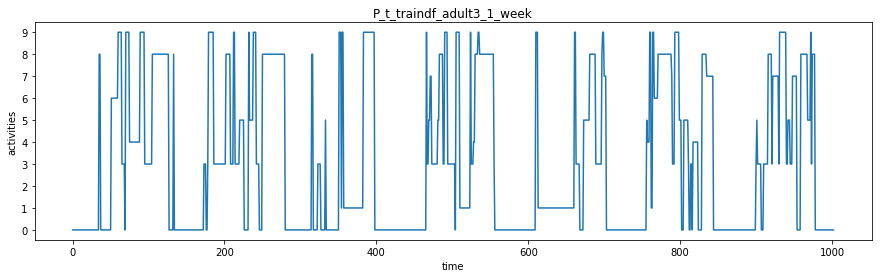

In [30]:
#sim one week for person
i = 4
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

numWeeks =1

activityList = Forecast_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0)

os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
#root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(numWeeks)+'_weeks'
plt.savefig(savelabel+'.png')

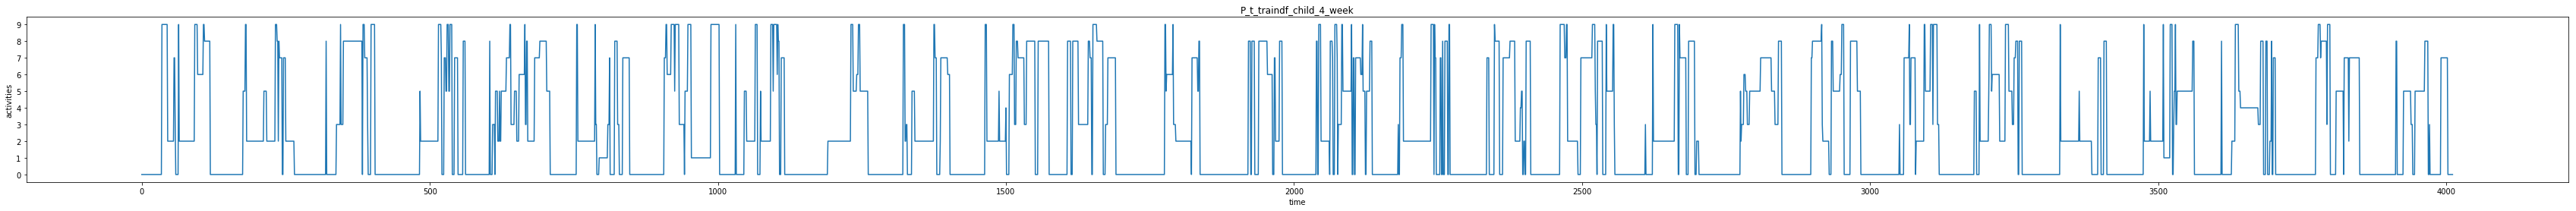

In [33]:
#sim one month for child
i = 8
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

numWeeks =4

activityList = Forecast_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0)

os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
#root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(numWeeks)+'_weeks'
plt.savefig(savelabel+'.png')

### Validation

In order to validate our model, we take the test sets that we had built previously with sklearn.model_selection, train_test_split.

We will try to predict the next activity of activities that were not in the "training set" used to build the transition matrices.

In [84]:
def validate(TEST_df_test,counter):
    TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
    TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
    
    predicted_next_activities = []
    for i in range(len(TEST_df_test["Next_Activity_short"])):

        transitionMatrix = all_P_t[counter] 
        namemod = all_P_t_labels[counter] 
        currentactivity = TEST_df_test["Current_Activity_short"][i]
        days =1
        time_steps = 1 # we want only to predict ONE step ahead

        #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
        nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
        predicted_next_activities.append(nextactivity)
        
    validation = [] # 1 for same, zero for different
    for i in range(len(TEST_df_test["Next_Activity_short"])):
        real_next_activity = TEST_df_test["Next_Activity_short"][i]
        predicted_next_activity = predicted_next_activities[i]
        if (real_next_activity == predicted_next_activity):
            validation.append(1)
        else: 
            validation.append(0)
    correct_predictions = sum(validation)
    tot_predictions = len(validation)
    indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
    print ("overall the model of %s was able to predict correctly %.4f percent of the next actions" %(namemod,correct_predictions*100/tot_predictions))    
    
    return predicted_next_activities,validation

def validate_weekly(TEST_df_test,counter):
    #print (len(TEST_df_test))
    TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
    TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
    
    predicted_next_activities = []
    for i in range(len(TEST_df_test["Next_Activity_short"])):

        transitionMatrix = all_week_P_t[counter] 
        namemod = P_t_labels[counter]
        
        currentactivity = TEST_df_test["Current_Activity_short"][i]
        days =1
        time_steps = 1 # we want only to predict ONE step ahead

        #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
        nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
        predicted_next_activities.append(nextactivity)
        
    validation = [] # 1 for same, zero for different
    for i in range(len(TEST_df_test["Next_Activity_short"])):
        real_next_activity = TEST_df_test["Next_Activity_short"][i]
        predicted_next_activity = predicted_next_activities[i]
        if (real_next_activity == predicted_next_activity):
            validation.append(1)
        else: 
            validation.append(0)
    correct_predictions = sum(validation)
    tot_predictions = len(validation)
    indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
    print ("overall the model of %s was able to predict correctly %.4f percent of the next actions" %(namemod,correct_predictions*100/tot_predictions))    
    
    return predicted_next_activities,validation

In [44]:
#all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
#all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [83]:
container_predicted_next_activities = [[] for i in range(len(all_test_df))]
container_validation = [[] for i in range(len(all_test_df))]

counter = 0
for test_df in all_test_df:
    predicted_next_activities,validation = validate(test_df,counter)
    container_predicted_next_activities[counter]= (predicted_next_activities)
    container_validation[counter]= (validation)
    counter += 1
    

overall the model of P_t_child was able to predict correctly 89.7014 percent of the next actions
overall the model of P_t_adult1 was able to predict correctly 89.4132 percent of the next actions
overall the model of P_t_adult2 was able to predict correctly 88.0807 percent of the next actions
overall the model of P_t_adult3 was able to predict correctly 87.9389 percent of the next actions
overall the model of P_t_adult4 was able to predict correctly 86.3409 percent of the next actions
overall the model of P_t_senior was able to predict correctly 86.9054 percent of the next actions


### Validation of new weekly Model 

In [85]:
container_predicted_next_activities = [[] for i in range(len(all_week_test_df))]
container_validation = [[] for i in range(len(all_week_test_df))]

counter = 0
for test_df in all_week_test_df:
    predicted_next_activities,validation = validate_weekly(test_df,counter)
    container_predicted_next_activities[counter]= (predicted_next_activities)
    container_validation[counter]= (validation)
    counter += 1
    

overall the model of P_t_traindf_adult1_weekdays was able to predict correctly 89.3927 percent of the next actions
overall the model of P_t_traindf_adult1_weekend was able to predict correctly 89.3732 percent of the next actions
overall the model of P_t_traindf_adult2_weekdays was able to predict correctly 88.2050 percent of the next actions
overall the model of P_t_traindf_adult2_weekend was able to predict correctly 87.6764 percent of the next actions
overall the model of P_t_traindf_adult3_weekdays was able to predict correctly 87.9232 percent of the next actions
overall the model of P_t_traindf_adult3_weekend was able to predict correctly 87.7343 percent of the next actions
overall the model of P_t_traindf_adult4_weekdays was able to predict correctly 86.6656 percent of the next actions
overall the model of P_t_traindf_adult4_weekend was able to predict correctly 86.7100 percent of the next actions
overall the model of P_t_traindf_child_weekdays was able to predict correctly 89.790

### One single example 

In [404]:
TEST_df_test = test_df_child
#print(TEST_df_test.columns)
TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
print(TEST_df_test["Next_Activity_short"][1])
print(len(TEST_df_test["Next_Activity_short"]))
print(len(TEST_df_test["Current_Activity_short"]))

8
64640
64640


In [424]:
predicted_next_activities = []
for i in range(len(TEST_df_test["Next_Activity_short"])):
    
    transitionMatrix = all_P_t[0] #P_t_child
    currentactivity = TEST_df_test["Current_Activity_short"][i]
    days =1
    time_steps = 1 # we want only to predict ONE step ahead

    #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
    nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
    predicted_next_activities.append(nextactivity)

In [413]:
# check how was the prediction!
validation = [] # 1 for same, zero for different
for i in range(len(TEST_df_test["Next_Activity_short"])):
    real_next_activity = TEST_df_test["Next_Activity_short"][i]
    predicted_next_activity = predicted_next_activities[i]
    if (real_next_activity == predicted_next_activity):
        validation.append(1)
    else: 
        validation.append(0)
correct_predictions = sum(validation)
tot_predictions = len(validation)
indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
print ("overall the model was able to predict correctly %.2f percent of the next actions" %(correct_predictions*100/tot_predictions))

        
    

overall the model was able to predict correctly 89.70 percent of the next actions


### check on the mistakes made

In [410]:
correct_predictions

57983

In [411]:
tot_predictions

64640

In [428]:
print (TEST_df_test["Current_Activity_short"][8])
print (TEST_df_test["Next_Activity_short"][8])
print (predicted_next_activities[8][0])

9
8
9


In [430]:
for i in indices_of_wrong_prediction:
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    if (preda != curra):
        print ("wrongly predicted index: %i" %i)
        print (TEST_df_test.loc[i,:])
        print ("Next activity: %s; Predicted: %s" %(nexta,preda))
        print ("")

In [432]:
for i in range(len(validation)):
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    if (preda != curra) & (preda == nexta):
        print ("%i Current activity: %s;  Next activity: %s;  Predicted: %s" %(i, curra, nexta,preda))
        print ("")
    

it has issues in predicting unusual trasitions from one state to a different one.